<a href="https://colab.research.google.com/github/elevien/phenotypic_variability_review/blob/main/phenotypic_switching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%config InlineBackend.figure_format = "svg"

In [ ]:
def growth_rate(y):
  L1 = (1-y[2])*1 + 1.5*y[2]
  L2 = (1-y[2])*1.5 + 1.*y[2]
  D = L1*y[0]/(y[0]+y[1]) + L2*y[1]/(y[0]+y[1]) 
  return D,L1,L2

def switching_ode(t, y,h):
  y_new = np.zeros(3)
  D,L1,L2 = growth_rate(y)   
  y_new[0] = (L1-D)*y[0] + h*(y[1] - y[0]) 
  y_new[1] = (L2-D)*y[1] - h*(y[1] - y[0]) 
  return y_new

def run_population(y0,environment,h):
  Y = []
  T = []
  epochs = environment[0]
  states = environment[1]
  y_last = [y0[0],y0[1],states[0]]
  
  for k in range(len(epochs))[:-1]:
    sol = solve_ivp(switching_ode, [epochs[k],epochs[k+1]], y_last,args=[h])
    Y.append(sol.y)
    T.append(sol.t)
    y_last = [sol.y[0,-1],sol.y[1,-1],states[k+1]]
  return np.concatenate(T),np.concatenate(Y,axis=1)



(0.0, 2.0)

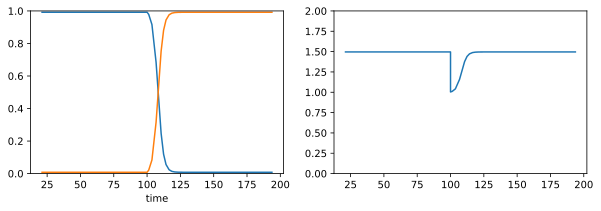

In [ ]:
T,Y = run_population([0.5,1],[[0,100,200],[0,1,0]],0.004)
T,Y = T[10:-1],Y[:,10:-1]
fig,axs = plt.subplots(ncols = 2,figsize=(10,3))
 
ax = axs[0]
ax.plot(T,Y[1,:]/(Y[1,:]+Y[0,:]))
ax.plot(T,Y[0,:]/(Y[1,:]+Y[0,:]))
ax.set_xlabel("time")
ax.set_ylim(0,1)

ax = axs[1]
ax.plot(T,[growth_rate(y)[0] for y in np.transpose(Y)])
ax.set_ylim(0,2)

[1.3333333333333333,
 1.290526179356472,
 1.2649524979732167,
 1.2563159903691419,
 1.2537780964357583,
 1.2532381834343203,
 1.2531675374641758,
 1.2532252546919938,
 1.2532914790776086,
 1.2534011611603488,
 1.2534326667775781,
 1.2533254819496193,
 1.2532507388385343,
 1.2532569429386453,
 1.2533505388579653,
 1.2534579875785876,
 1.2533875068151927,
 1.2532710995932708,
 1.253238131125317,
 1.2532941325793312,
 1.253434934729706,
 1.2533031363289058,
 1.2532273125508309,
 1.2532510517866116,
 1.2533963558538048,
 1.2532970083311867,
 1.2532339832841037,
 1.2532628035507092,
 1.2533977011040673,
 1.2532995449198097,
 1.2532366715579109,
 1.2532634347677303,
 1.253391623932106,
 1.2533001589162158,
 1.2532400290619274,
 1.2532663328540021,
 1.2533876781078406,
 1.2533011115759918,
 1.253243036000038,
 1.2532685483944856,
 1.253383765251834,
 1.2533019262992888,
 1.2532459370904898,
 1.2532707416658555,
 1.2533802542320673,
 1.2534567197180921,
 1.253355963684019,
 1.2532566185150862,